# 차원축소와 매니폴드 학습
## LAB 11-1 3차원 공간의 데이터에서 주성분을 찾아보자
***
실습목표: 3차원 공간에 두 축을 가지는 2차원 부분 공간에 약간의 잡음을 더한 데이터를 생성하자. 이 데이터에 주성분 분석을 한 뒤 찾은 주성분이 잡음을 생성한 축과 일치하는지 확인해 보자.
***

In [4]:
# 넘파이와 맷플롯립을 사용할 수 있도록 준비
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 2차원 부분공간에 약간의 잡음을 더해 생성
u = np.array([1,1,1]) / np.sqrt(3)
v = np.array([1,0,-1]) / np.sqrt(2)

# 1000개의 데이터 셋 생성
n_data = 1000
X = []
for _ in range(n_data):
    r_coeff = np.random.randn(2,)
    # 잡음 더하기
    data = 2.0 * r_coeff[0] * u + r_coeff[1] * v + 0.1 * np.random.rand(3,)
    X.append(data)
    
X = np.array(X)  

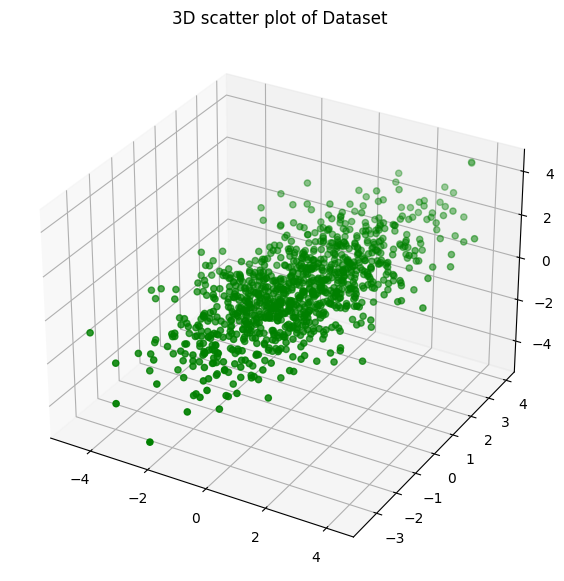

In [6]:
# 가시화를 위한 맷플롯립 figure 만들기
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

# 3차원 공간에 데이터 가시화
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green")
plt.title("3D scatter plot of Dataset")
plt.show()

In [7]:
# 평균을 빼서 데이터 중심을 원점으로 옮김
X_adj = X - X.mean(axis = 0)
# 특이값 분해를 실행함
U, S, Vt = np.linalg.svd(X_adj)
# 주성분을 담고 있는 행렬
Vt.T


array([[-0.581998  , -0.70322241,  0.40835838],
       [-0.57746977,  0.00384122, -0.81640303],
       [-0.57254432,  0.71095955,  0.40832526]])

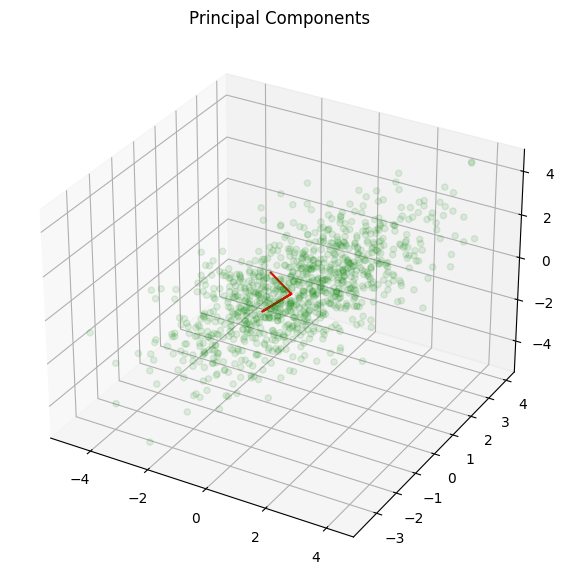

In [8]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection = "3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2], color = "green", alpha = 0.1)
plt.title("Principal Components")
origin = np.zeros((1,3))

# 주성분을 나타내는 벡터를 그리기 위한 좌표 생성
C = np.concatenate( (origin, Vt[0, :].reshape(-1, 3),
                    origin, Vt[1, :].reshape(-1,3)), axis =0)

# 주성분 그리기
ax.plot3D(C[:, 0], C[:,1], C[:,2], color = "red")
plt.show()

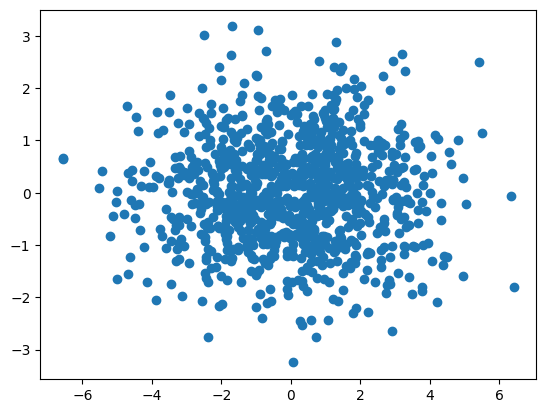

In [9]:
W_2d = Vt.T[:, :2]
X_2d = X_adj.dot(W_2d)
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.show()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

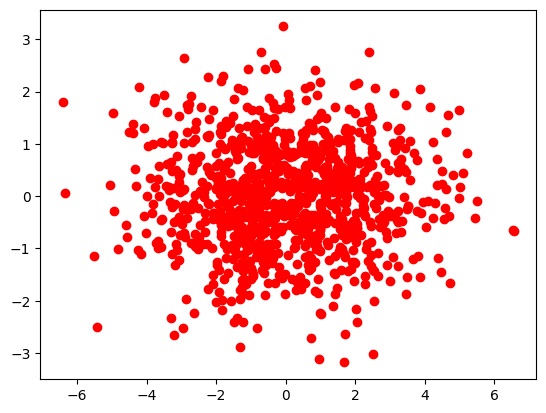

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d_sklearn = pca.fit_transform(X)
plt.scatter(X_2d_sklearn[:, 0], X_2d_sklearn[:, 1], color='r')
plt.show()

## LAB 11-2 주성분을 추출해 이미지를 압축해 보자
***
실습목표: 주성분은 원래 데이터의 중요한 정보를 담고 있는 축을 추출해 낸다. 따라서 주성분을 얼마나 선택하느냐에 따라 원래의 정보를 얼마나 남길 것인지가 결정된다. 이러한 특성을 이용하여 주성분 분석으로 이미지를 압축하고 복원해 보자.
***

In [13]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용, 테스트 데이터로 구분해 받자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables), (test_images, test_labels) = \
    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [16]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:
                axis = ax[i, j]
                axis.get_xaxis().set_visible(False)
                axis.get_yaxis().set_visible(False)
                axis.imshow(img[i*nCol+j], cmap = cmap)

<Figure size 640x480 with 0 Axes>

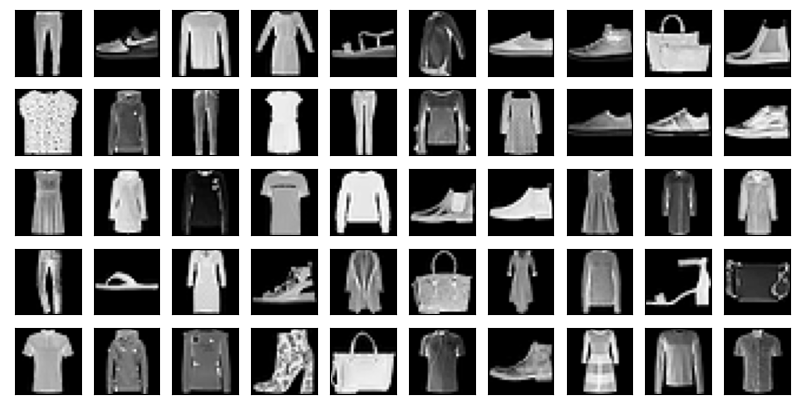

In [17]:
rndinx = np.random.randint(0, len(train_images) -50)
samples = train_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

In [18]:
from sklearn.decomposition import PCA
train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components=100)

train_reduced = pca.fit_transform(train_images_flat)

<Figure size 640x480 with 0 Axes>

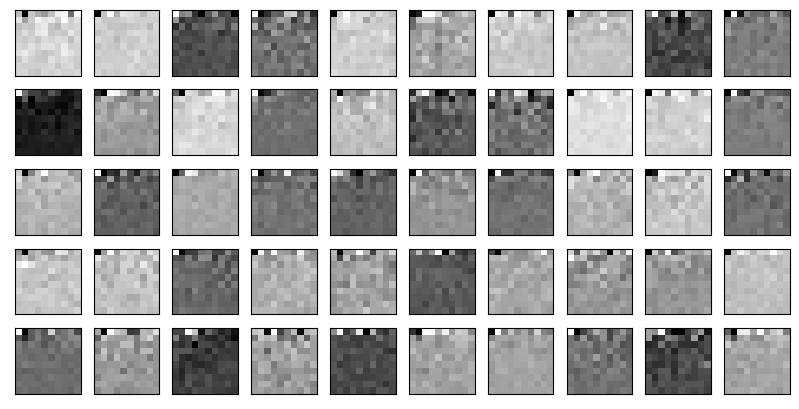

In [19]:
reduced_images = train_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx+50])